In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv('Data/Real-Data/Real_Combine.csv')


In [10]:
df.head()


,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,15.0,24.0,7.6,1017.4,81.0,0.6,2.2,7.6,284.795833
1,16.3,24.0,12.0,1017.2,80.0,0.8,1.3,9.4,219.720833
2,18.7,26.3,9.5,1015.3,64.0,1.6,1.7,7.6,182.187500
3,14.6,21.6,9.4,1018.4,72.0,2.7,9.4,18.3,154.037500
4,14.7,21.7,8.4,1017.1,71.0,1.8,10.9,22.2,223.208333


In [11]:
df=df.dropna()


In [12]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [13]:
X.isnull()


,T,TM,Tm,SLP,H,VV,V,VM
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


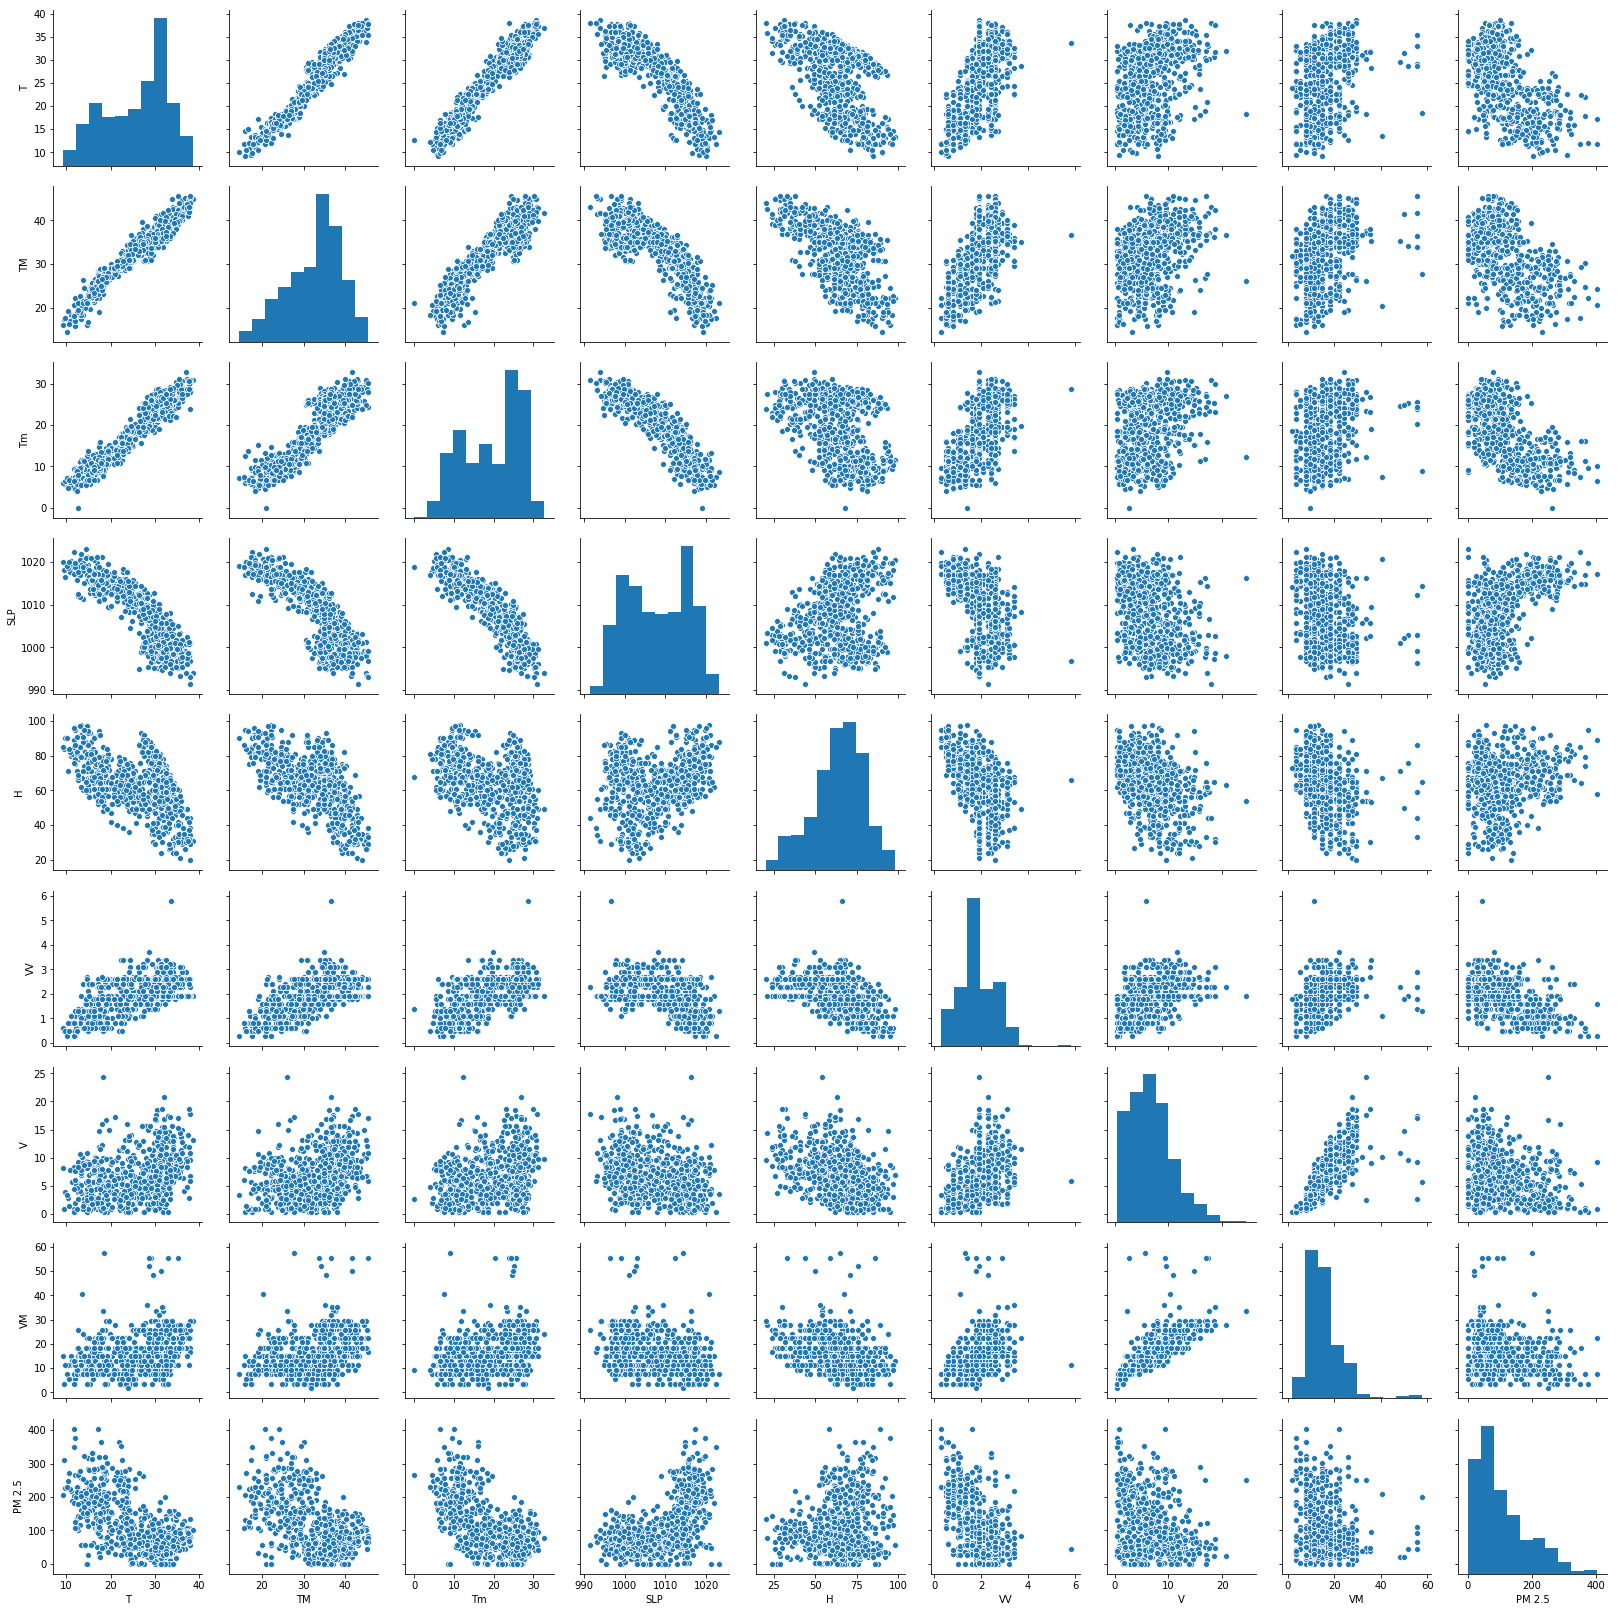

In [14]:
sns.pairplot(df)


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



In [16]:
from sklearn.tree import DecisionTreeRegressor

In [17]:
dtree=DecisionTreeRegressor(criterion='mse')

In [18]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [19]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(X_train, y_train)))


Coefficient of determination R^2 <-- on train set: 1.0


In [20]:
print("Coefficient of determination R^2 <-- on test set: {}".format(dtree.score(X_test, y_test)))


Coefficient of determination R^2 <-- on test set: 0.11329218577601807


In [21]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtree,X,y,cv=5)

In [22]:
score

array([-0.74693324, -0.20487941, -0.45483844,  0.242403  ,  0.23412615])